Classical Machine Learning Code for Quantum Digital Health Analytics

Directory Structure (Classical ML Version)

classical_health_system/
├── data_preprocessing.py
├── classical_model.py
├── notification_system.py
├── main_pipeline.py
└── requirements.txt


1️⃣ data_preprocessing.py

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def load_and_preprocess_data(filepath='healthcare_dataset.csv'):
    # Load data from CSV (simulate wearable data)
    data = pd.read_csv(filepath)
    X = data.drop(columns=['target'])  # Features
    y = data['target']                # Labels: 0-normal, 1-anomaly
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

def train_logistic_regression(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return model

def train_random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return model

def train_svm(X_train, X_test, y_train, y_test):
    model = SVC(kernel='rbf', probability=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("SVM Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return model


In [6]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

def send_email_alert(subject, body, to_email):
    from_email = "harikaburagapu7@gmail.com"
    password = "HarikaB@3111"
    
    msg = MIMEMultipart()
    msg['From'] = from_email
    msg['To'] = to_email
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))
    
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()
    server.login(from_email, password)
    server.sendmail(from_email, to_email, msg.as_string())
    server.quit()
    print("Notification sent successfully!")


In [7]:
from data_preprocessing import load_and_preprocess_data
from classical_model import train_logistic_regression, train_random_forest, train_svm
from notification_system import send_email_alert
import numpy as np

# Load and preprocess data
X_train, X_test, y_train, y_test = load_and_preprocess_data('health_data.csv')

# Train classical ML models
print("\n--- Logistic Regression ---")
logistic_model = train_logistic_regression(X_train, X_test, y_train, y_test)

print("\n--- Random Forest ---")
rf_model = train_random_forest(X_train, X_test, y_train, y_test)

print("\n--- SVM ---")
svm_model = train_svm(X_train, X_test, y_train, y_test)

# Trigger notification if high anomaly probability (using SVM as an example)
sample_data = X_test[0].reshape(1, -1)
anomaly_prob = svm_model.predict_proba(sample_data)[0][1]
if anomaly_prob > 0.7:
    send_email_alert(
        subject="Health Alert: Anomaly Detected!",
        body="A health anomaly has been detected based on real-time data. Please consult your doctor.",
        to_email="recipient@example.com"
    )


ModuleNotFoundError: No module named 'data_preprocessing'

In [1]:
pip install pandas matplotlib seaborn scikit-learn openpyxl


Head:
        Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0    Influenza   Yes    No     Yes                  Yes   19  Female   
1  Common Cold    No   Yes     Yes                   No   25  Female   
2       Eczema    No   Yes     Yes                   No   25  Female   
3       Asthma   Yes   Yes      No                  Yes   25    Male   
4       Asthma   Yes   Yes      No                  Yes   25    Male   

  Blood Pressure Cholesterol Level Outcome Variable  
0            Low            Normal         Positive  
1         Normal            Normal         Negative  
2         Normal            Normal         Negative  
3         Normal            Normal         Positive  
4         Normal            Normal         Positive  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 

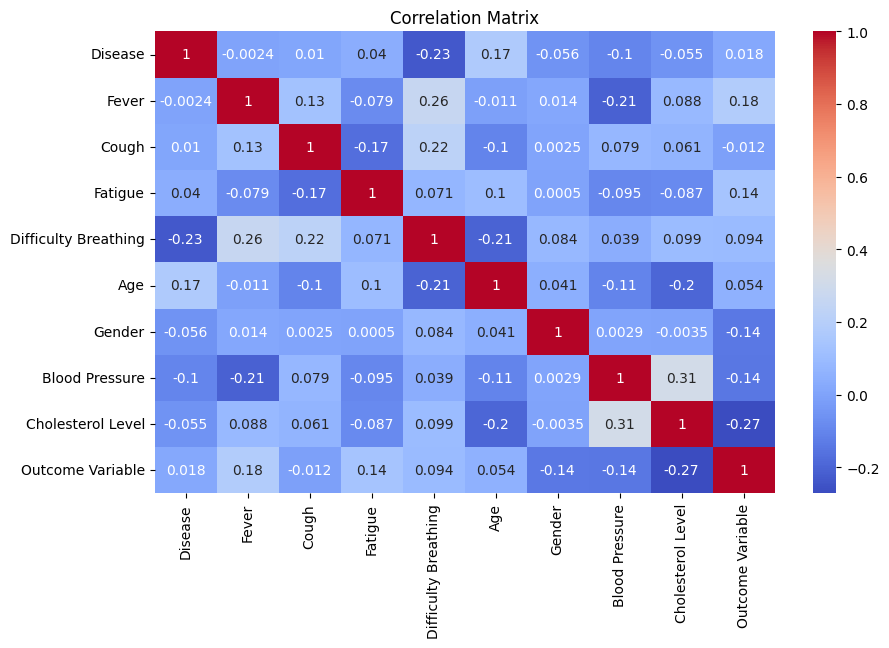

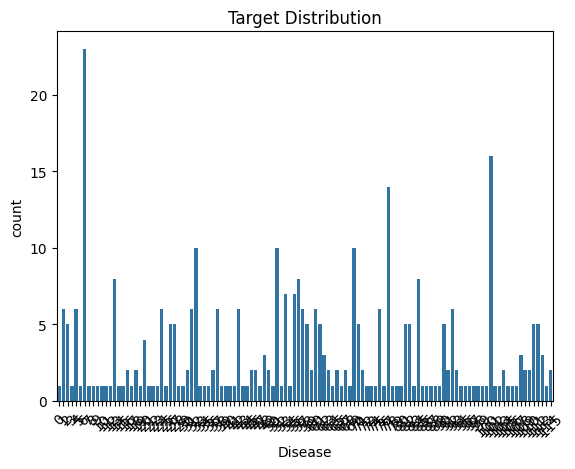

Accuracy: 0.3
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           6       0.75      0.67      0.71         9
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.50      0.50      0.50         2
          18       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         0
          27       0.00      0.00      0.00

C:\Users\harik\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harik\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harik\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

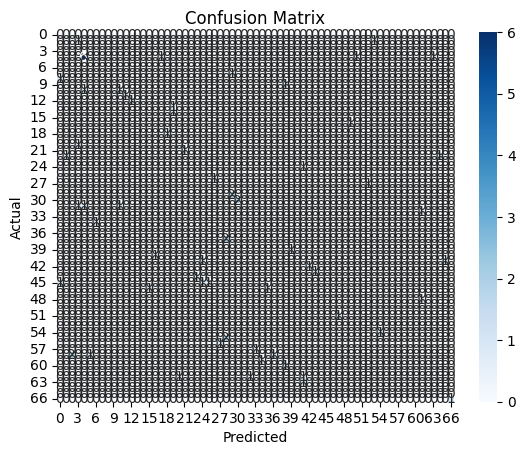

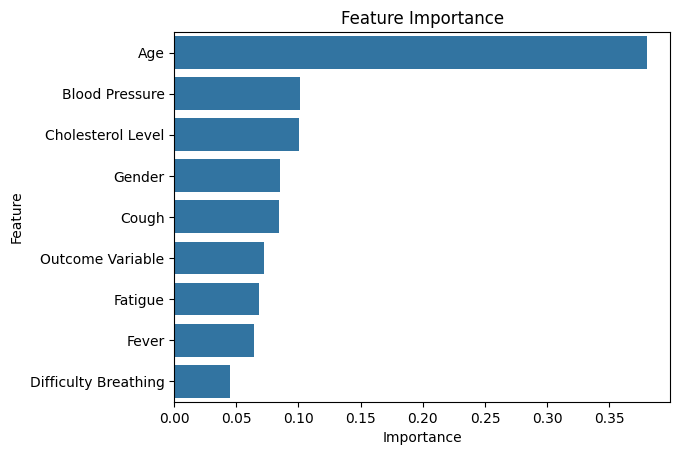

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load your dataset
filename = 'Disease_symptom_and_patient_profile_dataset.csv'  # Change to your file
df = pd.read_csv(filename)

# 2. Basic exploration
print("Head:\n", df.head())
print("\nInfo:\n", df.info())
print("\nNull values:\n", df.isnull().sum())

# 3. Data cleaning (optional: fill/drop missing values)
df = df.dropna()

# 4. Label Encoding for categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# 5. Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Plotting target distribution
target_col = 'Disease'  # Change based on your dataset
sns.countplot(data=df, x=target_col)
plt.title("Target Distribution")
plt.xticks(rotation=45)
plt.show()

# 6. Train-Test Split
X = df.drop(target_col, axis=1)
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. ML Model - Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 9. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 10. Feature Importance
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


C:\Users\harik\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from qiskit import Aer
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from qiskit.circuit.library import ZZFeatureMap
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")

# Assuming 'target' is the column for classification (binary) or regression (continuous)
X = data.drop(columns=['target'])
y = data['target']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Quantum Classification
feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=2)
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=Aer.get_backend('statevector_simulator'))
qsvc = QSVC(quantum_kernel=quantum_kernel)
qsvc.fit(X_train, y_train)
y_pred = qsvc.predict(X_test)

# Classical Random Forest for visualization
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Visualization: Feature Importance
feature_names = numerical_cols.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out().tolist()
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

# Create a bar chart for feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(10), importances[indices], align='center')
plt.yticks(range(10), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features for Disease Prediction')
plt.show()

# Confusion Matrix for Classification
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for QSVC')
plt.show()

ImportError: cannot import name 'Aer' from 'qiskit' (C:\Users\harik\AppData\Roaming\Python\Python312\site-packages\qiskit\__init__.py)

In [2]:
pip install qiskit-aer

Note: you may need to restart the kernel to use updated packages.


In [3]:
from qiskit_aer import AerSimulator

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from qiskit_aer import AerSimulator  # Updated import
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from qiskit.circuit.library import ZZFeatureMap
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")

# Assuming 'target' is the column for classification (binary) or regression (continuous)
X = data.drop(columns=['target'])
y = data['target']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Quantum Classification
feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=2)
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=AerSimulator())  # Updated to AerSimulator
qsvc = QSVC(quantum_kernel=quantum_kernel)
qsvc.fit(X_train, y_train)
y_pred = qsvc.predict(X_test)

# Classical Random Forest for visualization
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Visualization: Feature Importance
feature_names = numerical_cols.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out().tolist()
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

# Create a bar chart for feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(10), importances[indices], align='center')
plt.yticks(range(10), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features for Disease Prediction')
plt.show()

# Confusion Matrix for Classification
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for QSVC')
plt.show()

ImportError: cannot import name 'Sampler' from 'qiskit.primitives' (C:\Users\harik\AppData\Roaming\Python\Python312\site-packages\qiskit\primitives\__init__.py)

In [5]:
pip show qiskit qiskit-aer qiskit-machine-learning

Name: qiskit
Version: 2.0.1
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: C:\Users\harik\AppData\Roaming\Python\Python312\site-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-machine-learning
---
Name: qiskit-aer
Version: 0.17.0
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: C:\Users\harik\AppData\Roaming\Python\Python312\site-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 
---
Name: qiskit-machine-learning
Version: 0.8.2
Summary: Qiskit Machine Learning: A library of quantum computing machine learning expe

Classification Accuracy: 0.3000


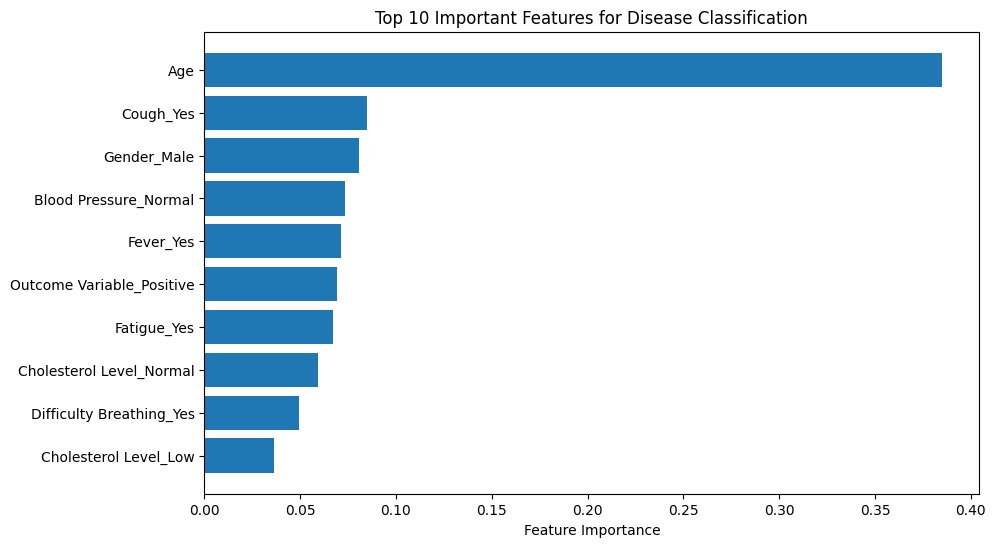

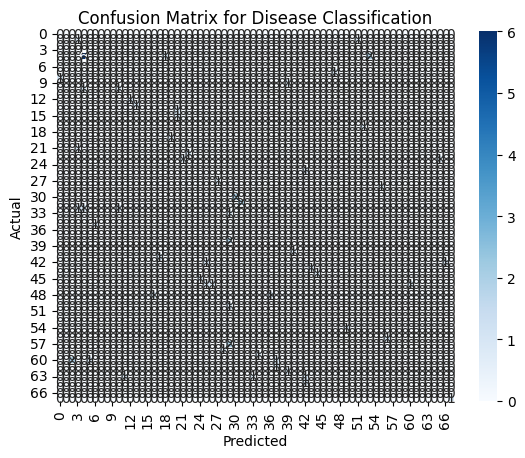

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
try:
    data = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")
except FileNotFoundError:
    print("Error: Dataset file not found. Please ensure 'Disease_symptom_and_patient_profile_dataset.csv' is in the working directory.")
    exit()

# Assuming 'Disease' for classification (binary) and 'Severity' for regression (continuous)
# Replace with actual column names if different
classification_target = 'Disease'
regression_target = 'Severity'

# Check if target columns exist
if classification_target not in data.columns and regression_target not in data.columns:
    print(f"Error: Neither '{classification_target}' nor '{regression_target}' found in dataset. Please specify correct target columns.")
    exit()

# Classification
if classification_target in data.columns:
    X = data.drop(columns=[classification_target])
    y = data[classification_target]

    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

    # Preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
        ])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply preprocessing
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)

    # Random Forest Classifier
    rf_clf = RandomForestClassifier(random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)

    # Metrics
    accuracy = rf_clf.score(X_test, y_test)
    print(f"Classification Accuracy: {accuracy:.4f}")

    # Visualization: Feature Importance
    feature_names = numerical_cols.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out().tolist()
    importances = rf_clf.feature_importances_
    indices = np.argsort(importances)[-10:]  # Top 10 features

    plt.figure(figsize=(10, 6))
    plt.barh(range(10), importances[indices], align='center')
    plt.yticks(range(10), [feature_names[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.title('Top 10 Important Features for Disease Classification')
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Disease Classification')
    plt.show()

# Regression
if regression_target in data.columns:
    X = data.drop(columns=[regression_target])
    y = data[regression_target]

    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

    # Preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
        ])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply preprocessing
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)

    # Random Forest Regressor
    rf_reg = RandomForestRegressor(random_state=42)
    rf_reg.fit(X_train, y_train)
    y_pred_reg = rf_reg.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred_reg)
    r2 = r2_score(y_test, y_pred_reg)
    print(f"Regression Metrics: MSE = {mse:.4f}, R² = {r2:.4f}")

    # Visualization: Predicted vs Actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_reg, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Severity')
    plt.ylabel('Predicted Severity')
    plt.title('Predicted vs Actual Disease Severity')
    plt.show()

    # Visualization: Residual Plot
    residuals = y_test - y_pred_reg
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_reg, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Severity')
    plt.ylabel('Residuals')
    plt.title('Residual Plot for Disease Severity Prediction')
    plt.show()

In [14]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt

# Define a quantum state for a single qubit
# Example: |psi> = cos(theta/2)|0> + e^(i*phi)*sin(theta/2)|1>
theta = np.pi / 4  # Angle theta (controls z-axis component)
phi = np.pi / 2    # Angle phi (controls x-y plane phase)

# Calculate Bloch sphere coordinates
x = np.sin(theta) * np.cos(phi)  # x = sin(θ)cos(φ)
y = np.sin(theta) * np.sin(phi)  # y = sin(θ)sin(φ)
z = np.cos(theta)                # z = cos(θ)

# Create a quantum circuit to prepare the state
qc = QuantumCircuit(1)
qc.ry(theta, 0)  # Rotate around y-axis by theta
qc.rz(phi, 0)    # Rotate around z-axis by phi

# Simulate the circuit to get the statevector
simulator = AerSimulator(method='statevector')
result = simulator.run(qc).result()
statevector = result.get_statevector()

# Plot the Bloch sphere
plt.figure(figsize=(6, 6))
plot_bloch_vector([x, y, z], title="Bloch Sphere Representation")
plt.show()

# Print the statevector for verification
print("Statevector:", statevector)


QiskitError: 'No statevector for experiment "None"'

In [15]:
pip install matplotlib==3.9.2

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib==3.9.2 in c:\users\harik\appdata\roaming\python\python312\site-packages (3.9.2)



In [2]:
pip install pandas scikit-learn matplotlib seaborn qiskit qiskit-machine-learning imbalanced-learn


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\harik\appdata\roaming\python\python312\site-packages (2.2.2)

   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   --------------------

In [3]:
"""
Quantum + classical regression on Disease_symptom_and_patient_profile_dataset.csv
Predicts the numeric column 'Severity'
"""

import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

# Classical baseline
from sklearn.svm import SVR

# Quantum pieces
from qiskit import BasicAer
from qiskit.utils import algorithm_globals
from qiskit.circuit.library import ZFeatureMap, TwoLocal
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.algorithms import NeuralNetworkRegressor

# ------------------ 1  Load data ------------------
FILE = "Disease_symptom_and_patient_profile_dataset.csv"
TARGET = "Severity"               # change if needed

df = pd.read_csv(FILE).dropna()
if TARGET not in df.columns:
    raise ValueError(f"Column '{TARGET}' not in dataset!")

X0 = df.drop(columns=[TARGET])
y  = df[TARGET]

cat_cols = X0.select_dtypes('object').columns
num_cols = X0.select_dtypes(include=['int64', 'float64']).columns

# ------------------ 2  Preprocess ------------------
pre = ColumnTransformer([
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
      ])

X = pre.fit_transform(X0)

# ------------------ 3  Dimensionality reduction for quantum ------------------
# Keep at most 6 features (6 qubits) – adjust if you have GPU simulator access
N_QUBITS = 6
if X.shape[1] > N_QUBITS:
    pca = PCA(n_components=N_QUBITS, whiten=True, random_state=42)
    X_q = pca.fit_transform(X)
else:
    pca = None
    X_q = X.copy()

# Scale to [0, π] for rotation angles
X_q = MinMaxScaler(feature_range=(0, np.pi)).fit_transform(X_q)

# ------------------ 4  Train-test split ------------------
X_train_c, X_test_c, y_train, y_test = train_test_split(X,   y, test_size=0.2, random_state=42)
X_train_q, X_test_q, *_            = train_test_split(X_q, y, test_size=0.2, random_state=42)

# ------------------ 5  📏 Classical baseline (SVR) ------------------
svr = SVR(kernel="rbf")
svr.fit(X_train_c, y_train)
y_pred_svr = svr.predict(X_test_c)

print(f"[SVR]  MSE={mean_squared_error(y_test, y_pred_svr):.4f}  R²={r2_score(y_test, y_pred_svr):.4f}")

# ------------------ 6  ⚛️  Quantum Variational Regressor ------------------
algorithm_globals.random_seed = 42
feature_map = ZFeatureMap(feature_dimension=X_q.shape[1], reps=2)
ansatz      = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz', reps=1)

qnn   = EstimatorQNN(feature_map, ansatz, reps=1024, quantum_instance=BasicAer.get_backend("statevector_simulator"))
vqr   = NeuralNetworkRegressor(qnn, optimizer=None)   # default COBYLA

vqr.fit(X_train_q, y_train)
y_pred_vqr = vqr.predict(X_test_q)

print(f"[VQR]  MSE={mean_squared_error(y_test, y_pred_vqr):.4f}  R²={r2_score(y_test, y_pred_vqr):.4f}")

# ------------------ 7  📊 Visualisation ------------------
def scatter(true, pred, title):
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=true, y=pred, alpha=.6)
    plt.plot([true.min(), true.max()], [true.min(), true.max()], 'r--')
    plt.xlabel("Actual"); plt.ylabel("Predicted"); plt.title(title); plt.tight_layout(); plt.show()

scatter(y_test, y_pred_svr, "SVR – Predicted vs Actual")
scatter(y_test, y_pred_vqr, "Quantum VQR – Predicted vs Actual")


ImportError: cannot import name 'BasicAer' from 'qiskit' (C:\Users\harik\AppData\Roaming\Python\Python312\site-packages\qiskit\__init__.py)

In [4]:
"""
Quantum + classical classification on Disease_symptom_and_patient_profile_dataset.csv
Predicts the categorical column 'Disease'
"""

import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# Quantum pieces
from qiskit import BasicAer
from qiskit.utils import algorithm_globals
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.algorithms import QSVC

# ------------------ 1  Load data ------------------
FILE = "Disease_symptom_and_patient_profile_dataset.csv"
TARGET = "Disease"                # change if needed

df = pd.read_csv(FILE).dropna()
if TARGET not in df.columns:
    raise ValueError(f"Column '{TARGET}' not in dataset!")

# Encode target
y = LabelEncoder().fit_transform(df[TARGET])

X0 = df.drop(columns=[TARGET])
cat_cols = X0.select_dtypes('object').columns
num_cols = X0.select_dtypes(include=['int64', 'float64']).columns

# ------------------ 2  Preprocess ------------------
pre = ColumnTransformer([
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
      ])

X = pre.fit_transform(X0)

# ------------------ 3  Reduce to ≤8 features for quantum (8 qubits) ------------------
N_QUBITS = 8
if X.shape[1] > N_QUBITS:
    pca = PCA(n_components=N_QUBITS, whiten=True, random_state=42)
    X_q = pca.fit_transform(X)
else:
    pca = None
    X_q = X.copy()

X_q = MinMaxScaler(feature_range=(0, 2*3.14159)).fit_transform(X_q)  # angles in [0,2π]

# ------------------ 4  Train-test split ------------------
X_train_c, X_test_c, y_train, y_test = train_test_split(X,  y, stratify=y, test_size=0.2, random_state=42)
X_train_q, X_test_q, *_            = train_test_split(X_q, y, stratify=y, test_size=0.2, random_state=42)

# ------------------ 5  📏 Classical baseline (Random Forest) ------------------
rf = RandomForestClassifier(n_estimators=300, class_weight='balanced')
rf.fit(X_train_c, y_train)
print("[RF]  Classification report\n", classification_report(y_test, rf.predict(X_test_c)))

# ------------------ 6  ⚛️  Quantum SVC ------------------
algorithm_globals.random_seed = 42
fmap   = ZZFeatureMap(feature_dimension=X_q.shape[1], reps=2)
qkernel = QuantumKernel(feature_map=fmap,
                        quantum_instance=BasicAer.get_backend("statevector_simulator"))

qsvc = QSVC(quantum_kernel=qkernel)
qsvc.fit(X_train_q, y_train)
y_pred_qsvc = qsvc.predict(X_test_q)

print("[QSVC]  Classification report\n", classification_report(y_test, y_pred_qsvc))

# ------------------ 7  📊 Visualisation ------------------
ConfusionMatrixDisplay.from_predictions(y_test, rf.predict(X_test_c), cmap='Blues')
plt.title("Random Forest – Confusion Matrix"); plt.tight_layout(); plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_qsvc, cmap='Purples')
plt.title("Quantum SVC – Confusion Matrix"); plt.tight_layout(); plt.show()


ImportError: cannot import name 'BasicAer' from 'qiskit' (C:\Users\harik\AppData\Roaming\Python\Python312\site-packages\qiskit\__init__.py)

In [5]:
!pip install pandas scikit-learn matplotlib seaborn qiskit qiskit-machine-learning


Defaulting to user installation because normal site-packages is not writeable
  Using cached qiskit_machine_learning-0.8.2-py3-none-any.whl.metadata (13 kB)
Using cached qiskit_machine_learning-0.8.2-py3-none-any.whl (231 kB)
